In [2]:
import quantumpropagator as qp
import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import interact,fixed #, interactive, fixed, interact_manual
import ipywidgets as widgets

import os
import sys
import glob
import pandas as pd
import numpy as np

%matplotlib inline

plt.rcParams.update({'font.size': 12})

### Getting data from Francoise folder

In [3]:
root = '/STORE/alessio/things/dox/Alessio-Francoise/Results_MD_October2019'
manu_root = '/home/alessio/u-3dPropagation_manuscript/Report/images'
# 'steps', 'fs', 'Norm deviation', 'Kinetic', 'Potential', 'Total', 'Total Deviation', 
# 'Xpulse', 'Ypulse', 'Zpulse', 'S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'Time AU', 
# 'Non-decided', 'Reactants', 'Products', 
# 'P(t) Tot', 'P(t) S0', 'P(t) S1', 'P(t) S2', 'P(t) S3', 'P(t) S4', 'P(t) S5', 'P(t) S6', 'P(t) S7'

### Positions

In [4]:
all_files_abs = sorted(glob.glob('/STORE/alessio/things/dox/Alessio-Francoise/Results_MD_October2019/positions/position-from*.txt'))
all_dfs = [pd.read_csv(x, index_col=0) for x in all_files_abs]

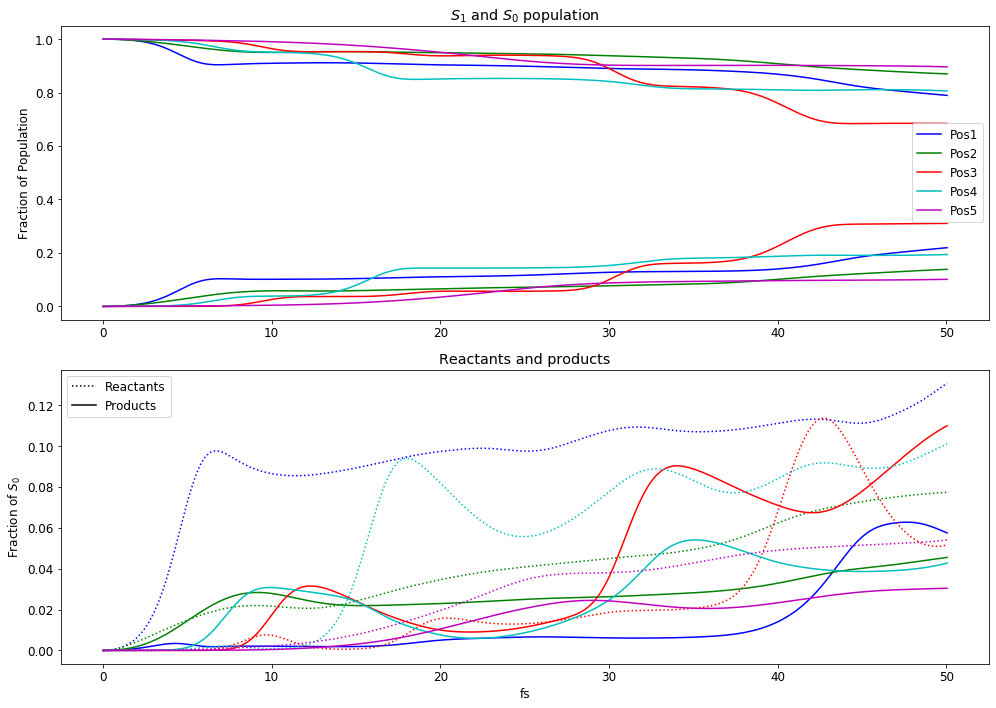

In [5]:
from matplotlib.lines import Line2D
positionpopulation_out = os.path.join(manu_root,'positionpopulation.png')

fig, [ax0,ax1] = plt.subplots(2,1,figsize = (14,10))
time = all_dfs[0]['fs']

labels = ['Pos1','Pos2','Pos3','Pos4','Pos5']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'mediumpurple']

for i, run in enumerate(all_dfs):
    lab = '{}'.format(labels[i])
    ax0.plot(time, run['S0'] + run['P(t) S0'], color = colors[i], label=lab)
    ax0.plot(time, run['S1'], color = colors[i])
    
    
    ax1.plot(time, run['Reactants'],color = colors[i], ls = ':')
    ax1.plot(time, run['Products'] + run['P(t) S0'],color = colors[i],)

ax0.set_ylabel(r'Fraction of Population')
ax1.set_ylabel(r'Fraction of $S_0$')
ax1.set_xlabel('fs')
ax0.legend()
ax0.set_title(r'$S_1$ and $S_0$ population')
ax1.set_title(r'Reactants and products')

custom_lines = [Line2D([0], [0], color='k', ls=':'), Line2D([0], [0], color='k')]
ax1.legend(custom_lines,['Reactants','Products'])
                                                            
fig.tight_layout()
fig.savefig(positionpopulation_out)

# Figures for the different runs

In [6]:
folders = ['FC', 'IR_INV', 'IR_LON', 'IR_NOR', 'UV', '2-3']
all_files_abs = [ os.path.join(os.path.join(root,x),x)+'.txt' for x in folders ]
print(all_files_abs)
all_dfs = [pd.read_csv(x, index_col=0) for x in all_files_abs ]
print(all_dfs[0].keys())

['/STORE/alessio/things/dox/Alessio-Francoise/Results_MD_October2019/FC/FC.txt', '/STORE/alessio/things/dox/Alessio-Francoise/Results_MD_October2019/IR_INV/IR_INV.txt', '/STORE/alessio/things/dox/Alessio-Francoise/Results_MD_October2019/IR_LON/IR_LON.txt', '/STORE/alessio/things/dox/Alessio-Francoise/Results_MD_October2019/IR_NOR/IR_NOR.txt', '/STORE/alessio/things/dox/Alessio-Francoise/Results_MD_October2019/UV/UV.txt', '/STORE/alessio/things/dox/Alessio-Francoise/Results_MD_October2019/2-3/2-3.txt']
Index(['steps', 'fs', 'Norm deviation', 'Kinetic', 'Potential', 'Total',
       'Total Deviation', 'Xpulse', 'Ypulse', 'Zpulse', 'S0', 'S1', 'S2', 'S3',
       'S4', 'S5', 'S6', 'S7', 'Time AU', 'Non-decided', 'Reactants',
       'Products', 'P(t) Tot', 'P(t) S0', 'P(t) S1', 'P(t) S2', 'P(t) S3',
       'P(t) S4', 'P(t) S5', 'P(t) S6', 'P(t) S7'],
      dtype='object')


/home/alessio/u-3dPropagation_manuscript/Report/images/graph-FC.png
/home/alessio/u-3dPropagation_manuscript/Report/images/graph-IR-INV.png
/home/alessio/u-3dPropagation_manuscript/Report/images/graph-IR-LON.png
/home/alessio/u-3dPropagation_manuscript/Report/images/graph-IR-NOR.png
/home/alessio/u-3dPropagation_manuscript/Report/images/graph-UV.png
/home/alessio/u-3dPropagation_manuscript/Report/images/graph-2-3.png


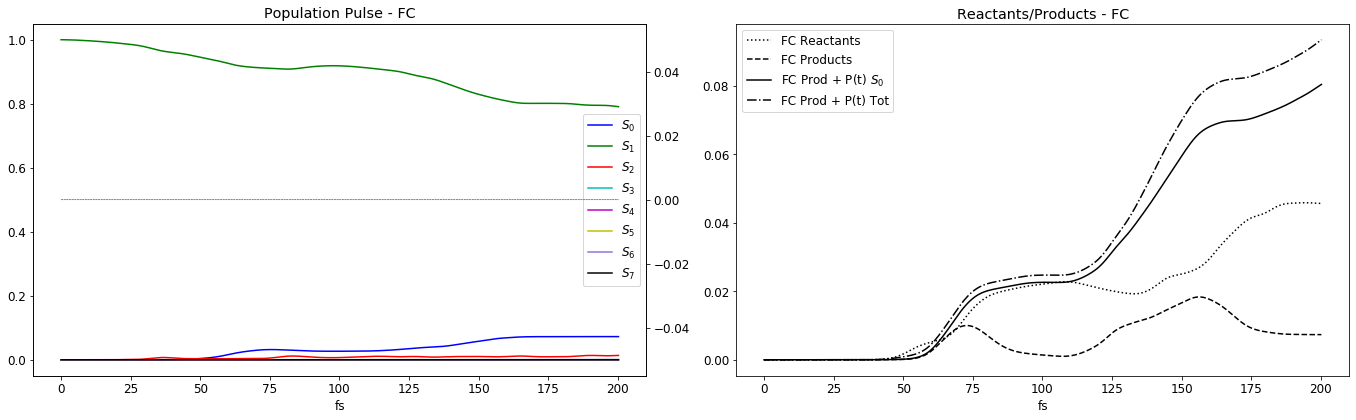

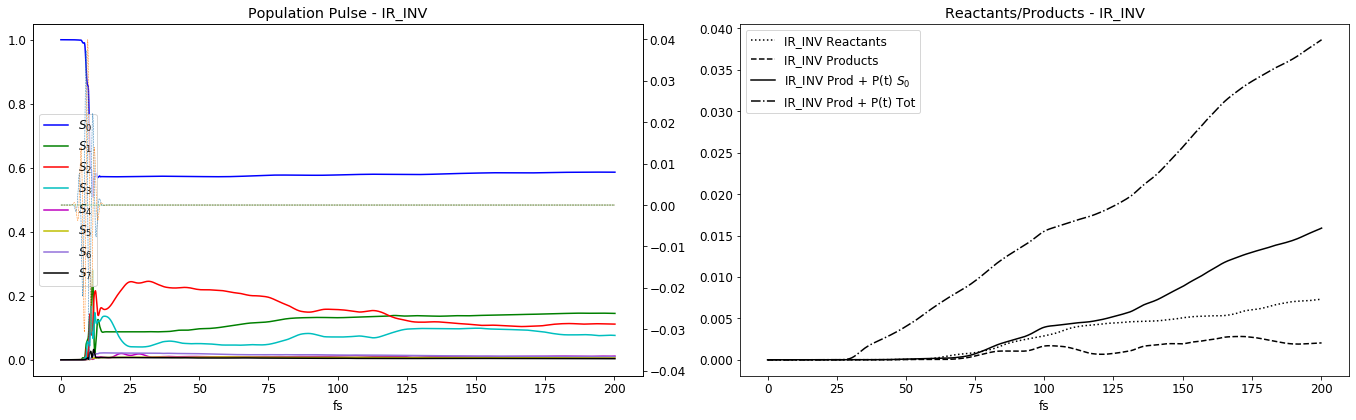

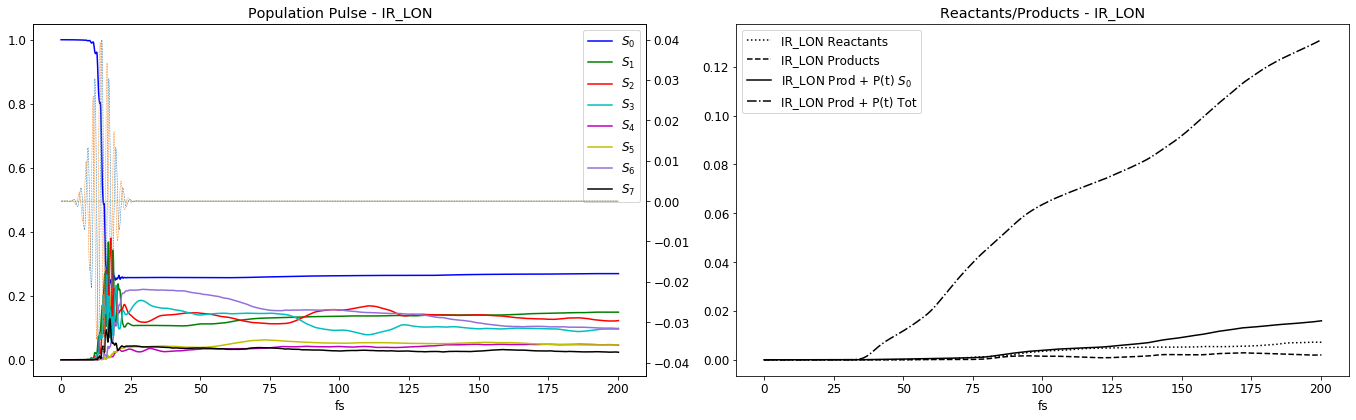

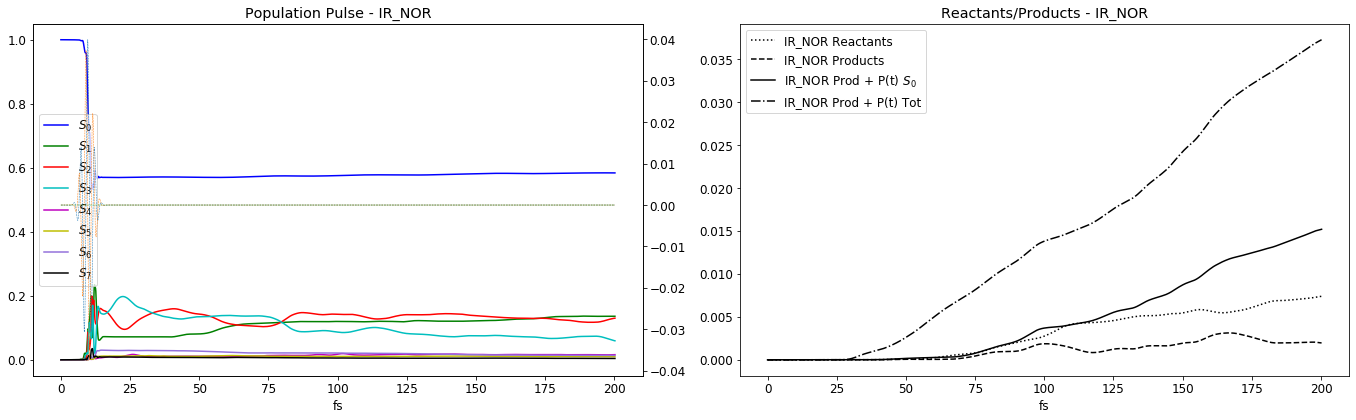

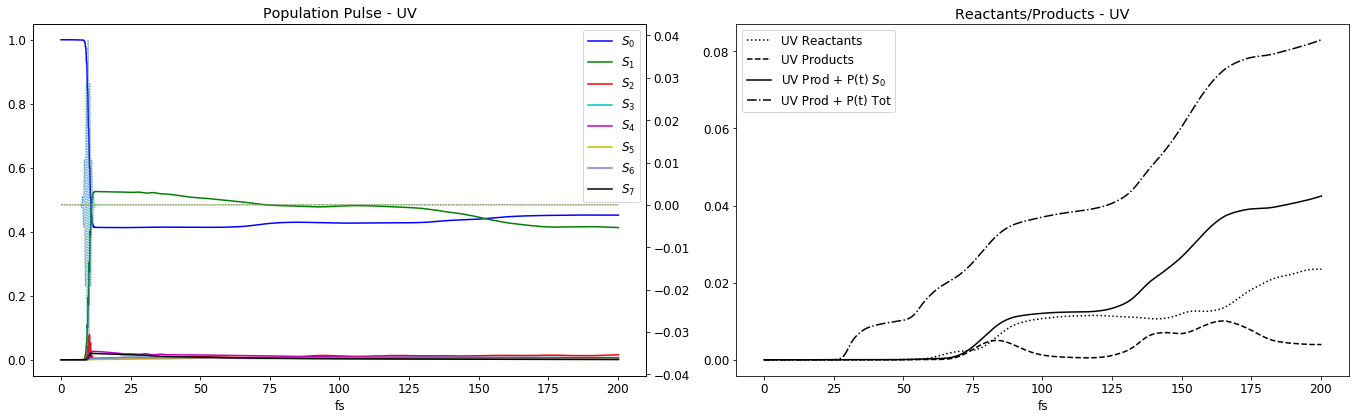

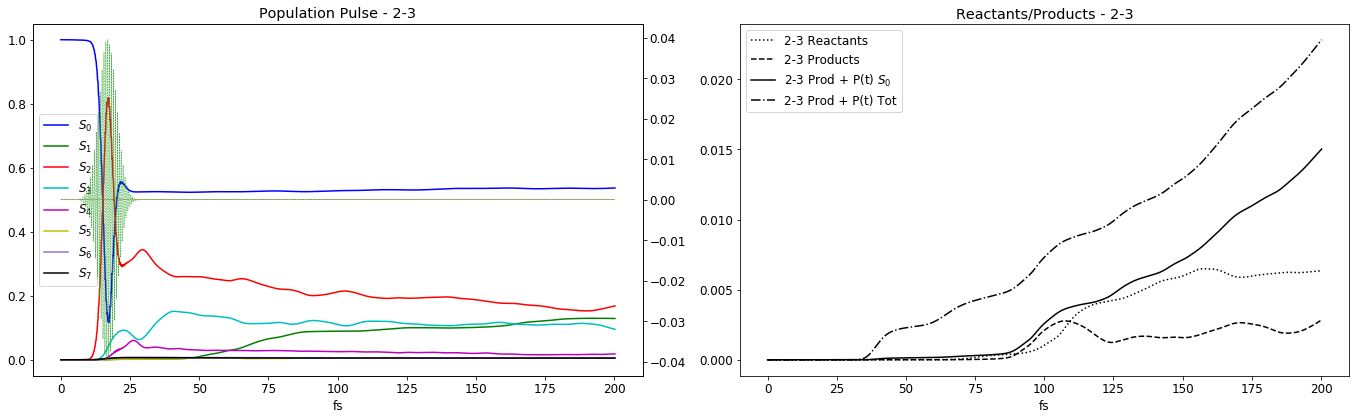

In [7]:
#%matplotlib ipympl

for jjj in range(len(folders)):

    this_df = all_dfs[jjj]

    fig, [ax0, ax1] = plt.subplots(1,2,figsize=(19,6))

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'mediumpurple', 'k']

    labelz = folders[jjj]

    for ind in range(8):
        kkey = 'S{}'.format(ind)
        true_label = r'$S_{}$'.format(ind)
        ax0.plot(this_df['fs'], this_df[kkey], label=true_label, color=colors[ind])

    ax00 = ax0.twinx()
    ax00.plot(this_df['fs'], this_df['Xpulse'], label='X_pulse', ls='--', lw=.5)
    ax00.plot(this_df['fs'], this_df['Ypulse'], label='Y_pulse', ls='--', lw=.5)
    ax00.plot(this_df['fs'], this_df['Zpulse'], label='Y_pulse', ls='--', lw=.5)
    ax0.set_title('Population Pulse - {}'.format(labelz))
    #ax0.set_xlim(0,50)
    ax0.set_xlabel('fs')
    ax0.legend()
    
    ax1.plot(this_df['fs'],  this_df['Reactants']   , label='{} Reactants'.format(labelz),ls = ':', color=colors[ind])
    ax1.plot(this_df['fs'],  this_df['Products']    , label='{} Products'.format(labelz) , ls='--',  color=colors[ind])
    ax1.plot(this_df['fs'],  this_df['Products'] + this_df['P(t) S0'], label=r'{} Prod + P(t) $S_0$'.format(labelz), color=colors[ind])
    ax1.plot(this_df['fs'],  this_df['Products'] + this_df['P(t) Tot'], label=r'{} Prod + P(t) Tot'.format(labelz), ls = '-.',  color=colors[ind])
    ax1.set_title('Reactants/Products - {}'.format(labelz))
    ax1.set_xlabel('fs')
    ax1.legend()

    fig.tight_layout()
    output_name = os.path.join(manu_root,'graph-{}.png'.format(labelz.replace('_','-')))
    print(output_name)
    fig.savefig(output_name)

# Figures for the in between bonds

/home/alessio/u-3dPropagation_manuscript/Report/images/UV-in-between.png


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/home/alessio/u-3dPropagation_manuscript/Report/images/IR-LON-in-between.png


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/home/alessio/u-3dPropagation_manuscript/Report/images/IR-NOR-in-between.png


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/home/alessio/u-3dPropagation_manuscript/Report/images/2-3-in-between.png


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

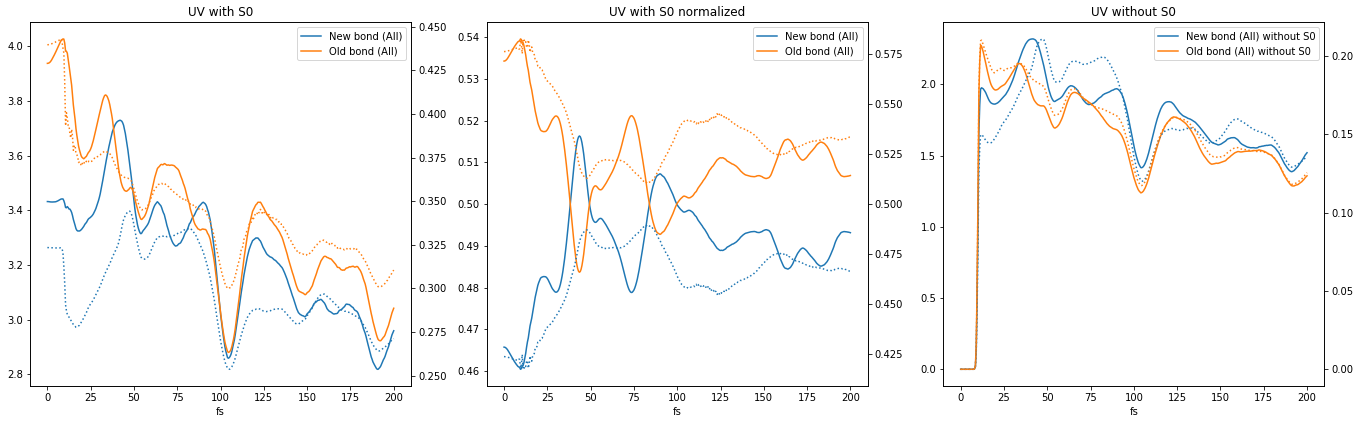

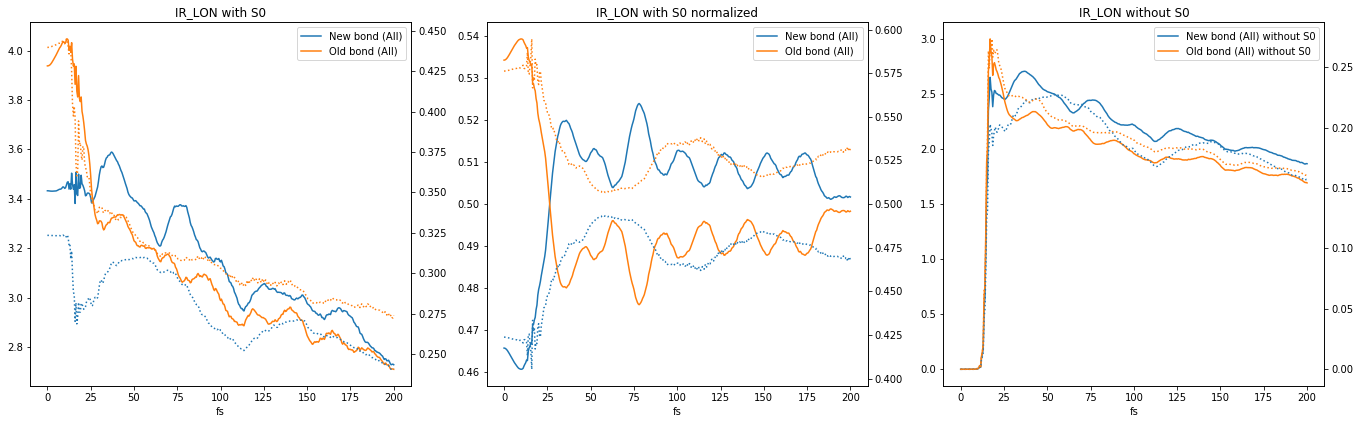

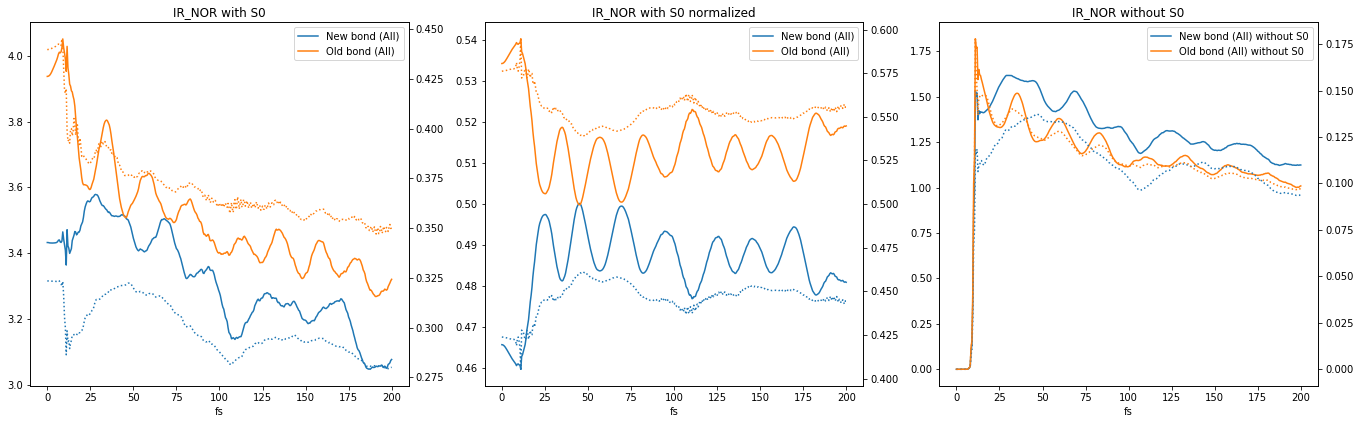

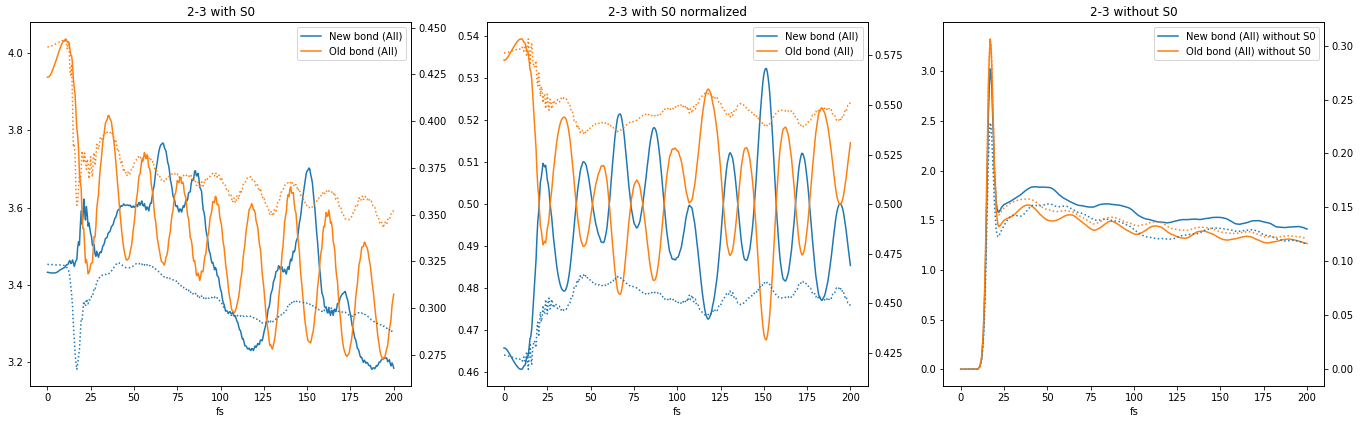

In [8]:
%matplotlib ipympl


folder_bb = '/STORE/alessio/things/dox/Alessio-Francoise/Results_MD_October2019'
subfolders = ['UV', 'IR_LON', 'IR_NOR', '2-3']
manu_root = '/home/alessio/u-3dPropagation_manuscript/Report/images'

for this in subfolders:
    abs_path = os.path.join(folder_bb, this)
    filename_abs = os.path.join(manu_root, '{}-in-between.png'.format(this.replace('_','-')))
    print(filename_abs)
    active_withs0 = os.path.join(abs_path, '{}_BONDS_r_c_1.4-non-overlapping_ACTIVE_with_s0.txt'.format(this))
    all_withs0 = os.path.join(abs_path,    '{}_BONDS_r_c_1.4-non-overlapping_ALL_with_s0.txt'.format(this))
    active_nos0 = os.path.join(abs_path,   '{}_BONDS_r_c_1.4-non-overlapping_ACTIVE_no_s0.txt'.format(this))
    all_nos0 = os.path.join(abs_path,      '{}_BONDS_r_c_1.4-non-overlapping_ALL_no_s0.txt'.format(this))
    list_of_files = [ all_withs0, active_withs0, all_nos0, active_nos0 ]
    fig, [ax0, ax1, ax2] = plt.subplots(1,3,figsize=(19,6))
    
    df_all_s0, df_active_s0, df_all_nos0, df_active_nos0 = [ pd.read_csv(x, index_col=0) for x in list_of_files]
    
    ax00 = ax0.twinx()
    
    ax0.plot(df_all_s0['Time'], df_all_s0['New Bond'], label = 'New bond (All)')
    ax0.plot(df_all_s0['Time'], df_all_s0['Old bond'], label = 'Old bond (All)')
    
    ax00.plot(df_active_s0['Time'], df_active_s0['New Bond'], ls = ':', label = 'New bond (Active)')
    ax00.plot(df_active_s0['Time'], df_active_s0['Old bond'], ls = ':', label = 'Old bond (Active)')

    ax11 = ax1.twinx()
    
    ax1.plot(df_all_s0['Time'], df_all_s0['New Bond']/(df_all_s0['New Bond']+df_all_s0['Old bond']), label = 'New bond (All)')
    ax1.plot(df_all_s0['Time'], df_all_s0['Old bond']/(df_all_s0['New Bond']+df_all_s0['Old bond']), label = 'Old bond (All)')
    
    ax11.plot(df_active_s0['Time'], df_active_s0['New Bond']/(df_active_s0['New Bond']+df_active_s0['Old bond']), ls = ':', label = 'New bond (Active)')
    ax11.plot(df_active_s0['Time'], df_active_s0['Old bond']/(df_active_s0['New Bond']+df_active_s0['Old bond']), ls = ':', label = 'Old bond (Active)')

    
    ax22 = ax2.twinx()

    ax2.plot(df_all_nos0['Time'], df_all_nos0['New Bond'], label = 'New bond (All) without S0')
    ax2.plot(df_all_nos0['Time'], df_all_nos0['Old bond'], label = 'Old bond (All) without S0')
    
    ax22.plot(df_active_nos0['Time'], df_active_nos0['New Bond'], ls = ':')
    ax22.plot(df_active_nos0['Time'], df_active_nos0['Old bond'], ls = ':')
    
    ax0.set_title('{} with S0'.format(this))    
    ax0.set_xlabel('fs')
    ax0.legend()
    
    ax1.set_title('{} with S0 normalized'.format(this))    
    ax1.set_xlabel('fs')
    ax1.legend()
       
    ax2.set_title('{} without S0'.format(this))    
    ax2.set_xlabel('fs')
    ax2.legend()

    fig.tight_layout()
    fig.savefig(filename_abs)
    

                       

# Figures for the dipoles

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

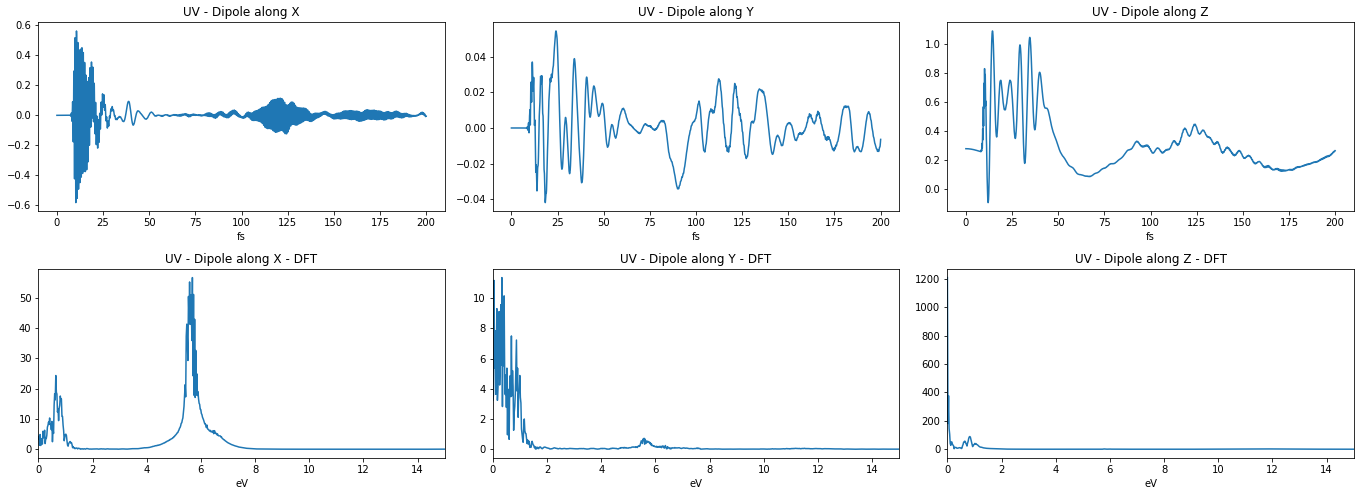

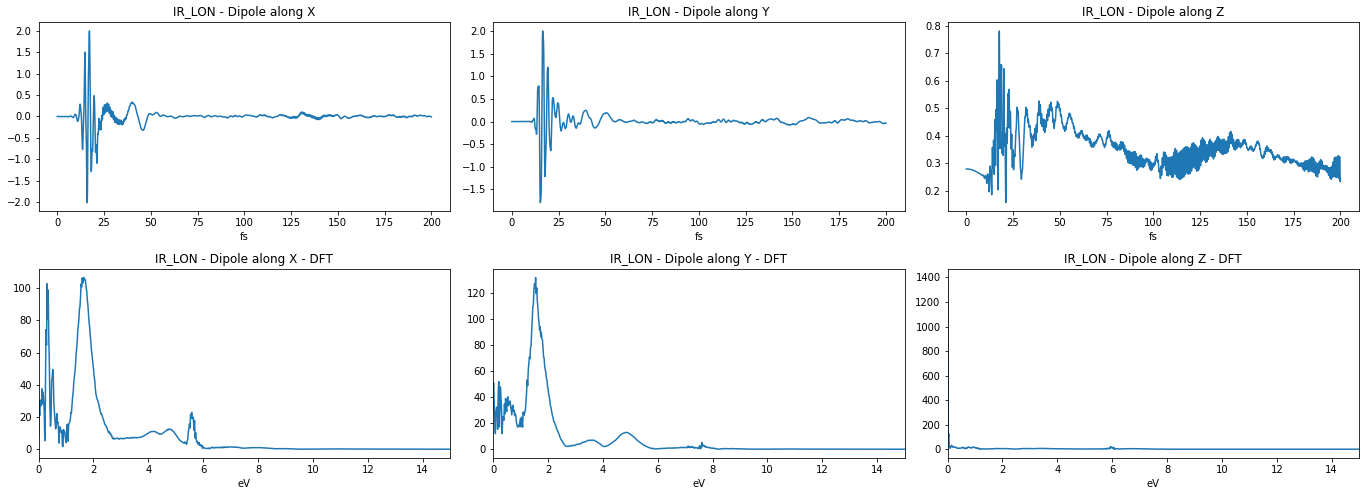

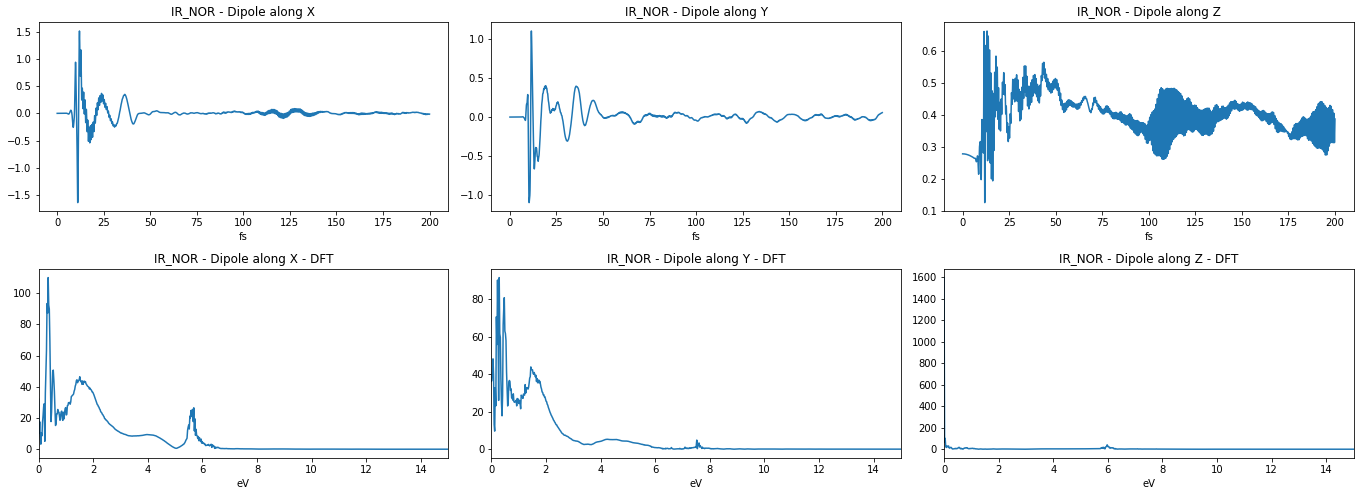

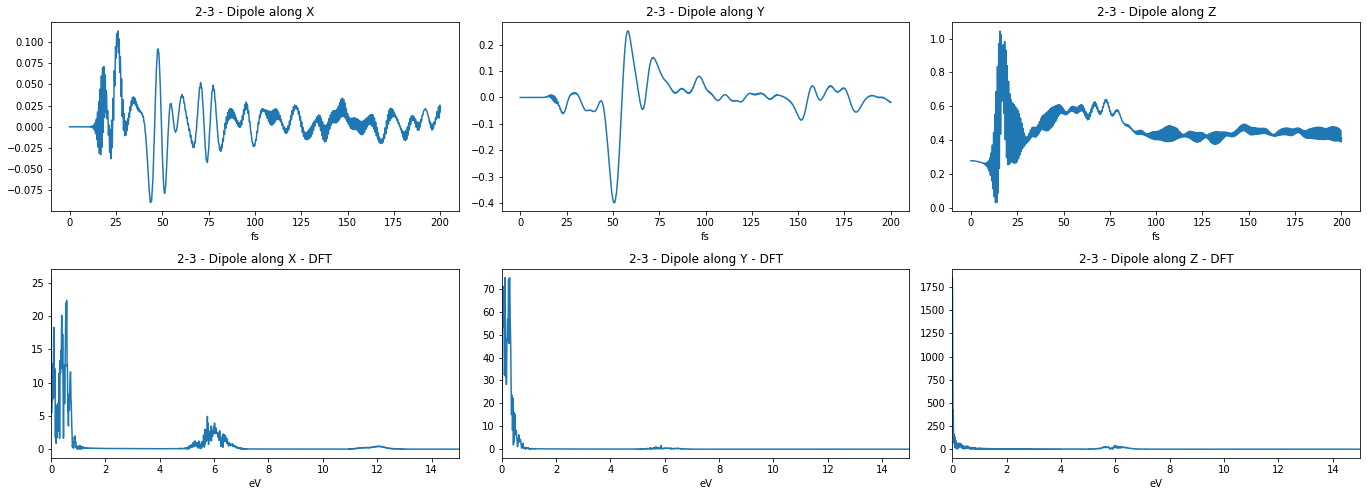

In [9]:
#%matplotlib ipympl

root = '/STORE/alessio/things/dox/Alessio-Francoise/Results_MD_October2019'
manu_root = '/home/alessio/u-3dPropagation_manuscript/Report/images'

subfolders = [ 'UV', 'IR_LON', 'IR_NOR', '2-3']
#subfolders = ['2-3']

for this in subfolders:
    abs_path = os.path.join(root, this)
    filename_abs = os.path.join(manu_root, '{}-dipole.png'.format(this.replace('_','-')))
    
    dipoles = os.path.join(abs_path, '{}_dipoles.txt'.format(this))
    dipoles_dft = os.path.join(abs_path,    '{}_dipoles_DFT.txt'.format(this))

    list_of_files = [ dipoles, dipoles_dft ]

    
    df_dipoles, df_dipoles_DFT = [ pd.read_csv(x, index_col=0) for x in list_of_files]
    
    
    fig, [[ax0, ax1, ax2],[ax3,ax4,ax5]] = plt.subplots(2,3,figsize=(19,7))

    x0 = df_dipoles['time fs']
    
    y0 = df_dipoles['dipx']    
    ax0.plot(x0,y0)
    ax0.set_title('{} - Dipole along X'.format(this))    
    ax0.set_xlabel('fs')
    
    y1 = df_dipoles['dipy']
    ax1.plot(x0,y1)
    ax1.set_title('{} - Dipole along Y'.format(this))    
    ax1.set_xlabel('fs')

    y2 = df_dipoles['dipz']
    ax2.plot(x0,y2)
    ax2.set_title('{} - Dipole along Z'.format(this))    
    ax2.set_xlabel('fs')
    
    x3 = df_dipoles_DFT['DFT-Frequencies eV']
    y3 = df_dipoles_DFT['DFT-dipx']
    ax3.plot(x3,y3)
    ax3.set_title('{} - Dipole along X - DFT'.format(this))    
    ax3.set_xlim(0,15)
    ax3.set_xlabel('eV')

    y4 = df_dipoles_DFT['DFT-dipy']
    ax4.plot(x3,y4)
    ax4.set_title('{} - Dipole along Y - DFT'.format(this))
    ax4.set_xlim(0,15)
    ax4.set_xlabel('eV')
    
    y5 = df_dipoles_DFT['DFT-dipz']
    ax5.plot(x3,y5)
    ax5.set_title('{} - Dipole along Z - DFT'.format(this))
    ax5.set_xlim(0,15)
    ax5.set_xlabel('eV')
    
    fig.tight_layout()
    fig.savefig(filename_abs)

In [10]:
df_dipoles.keys(), df_dipoles_DFT.keys()

(Index(['time fs', 'dipx', 'trans_x_0_1', 'trans_x_0_4', 'trans_x_1_2',
        'trans_x_1_3', 'trans_x_1_4', 'trans_x_2_3', 'trans_x_2_4',
        'trans_x_2_5', 'dipy', 'trans_y_0_1', 'trans_y_1_2', 'trans_y_1_3',
        'trans_y_2_3', 'trans_y_2_4', 'trans_y_6_7', 'dipz', 'perm_z_0',
        'perm_z_1', 'perm_z_2', 'perm_z_3', 'trans_z_0_1', 'trans_z_0_2',
        'trans_z_1_2', 'trans_z_1_3', 'trans_z_2_3'],
       dtype='object'),
 Index(['DFT-Frequencies eV', 'DFT-dipx', 'DFT-trans_x_0_1', 'DFT-trans_x_0_4',
        'DFT-trans_x_1_2', 'DFT-trans_x_1_3', 'DFT-trans_x_1_4',
        'DFT-trans_x_2_3', 'DFT-trans_x_2_4', 'DFT-trans_x_2_5', 'DFT-dipy',
        'DFT-trans_y_0_1', 'DFT-trans_y_1_2', 'DFT-trans_y_1_3',
        'DFT-trans_y_2_3', 'DFT-trans_y_2_4', 'DFT-trans_y_6_7', 'DFT-dipz',
        'DFT-perm_z_0', 'DFT-perm_z_1', 'DFT-perm_z_2', 'DFT-perm_z_3',
        'DFT-trans_z_0_1', 'DFT-trans_z_0_2', 'DFT-trans_z_1_2',
        'DFT-trans_z_1_3', 'DFT-trans_z_2_3'],
       dtyp

In [36]:
def gau_window(t,sigma,t0):
    ''' 
    It returns the value of the gaussian envelope for the pulse at time t
    now it works with arrays, too
    '''
    num = (t-t0)**2
    den = 2*(sigma**2)
    if (den == 0): 
        if type(t) == float:
            result = 0.0 
        else:
            result = np.zeros_like(t)
    else:
        result = np.exp(-num/den)
    norm = np.linalg.norm(result)
    return result/norm

(4001,) (4001,)
(4001,)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

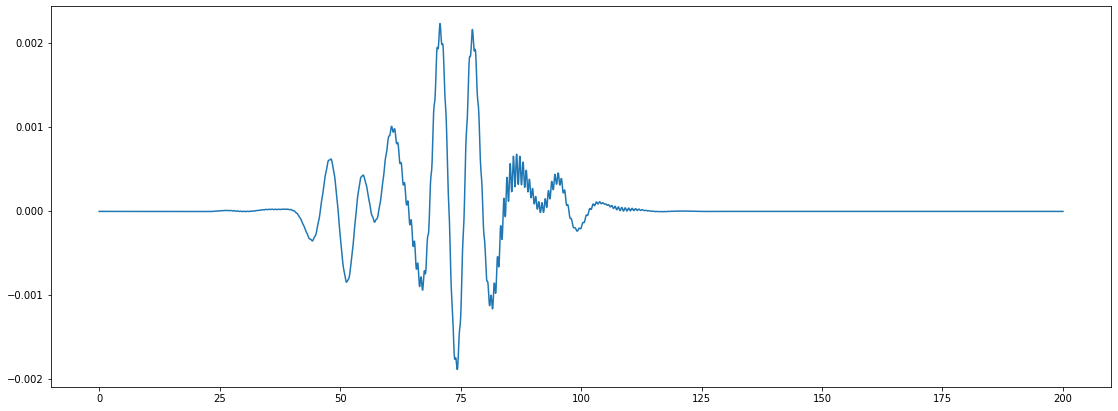

In [38]:
from scipy import signal

time = np.array(x0)
dipole = np.array(y0)
print (time.shape, dipole.shape)

N = dipole.shape[0]

window = signal.gaussian(N, std=14)

print(window.shape)

fig, ax0 = plt.subplots(1,1,figsize=(19,7))
ax0.plot(time., window)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

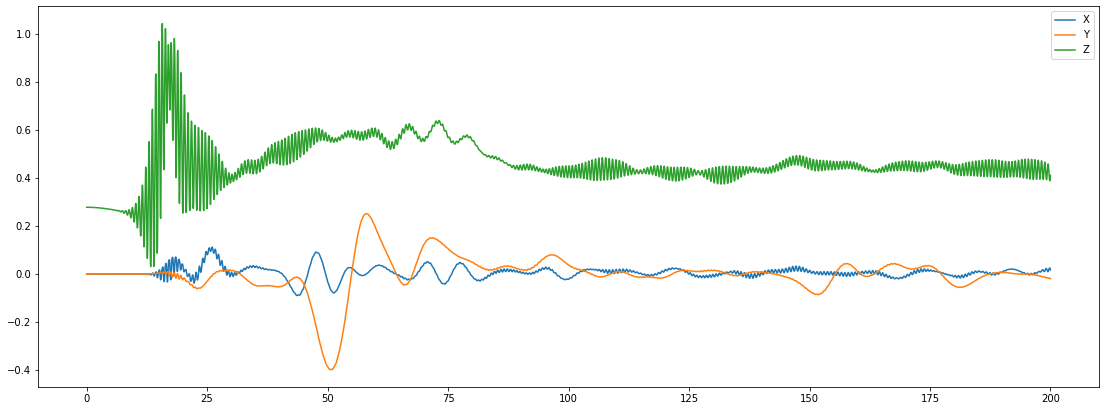

In [12]:

fig, ax0 = plt.subplots(1,1,figsize=(19,7))

x = df_dipoles['time fs']
y = df_dipoles['dipx']
y2 = df_dipoles['dipy']
y3 = df_dipoles['dipz']

ax0.plot(x,y, label='X')
ax0.plot(x,y2, label='Y')
ax0.plot(x,y3, label='Z')
ax0.legend();

In [1]:
fig, ax0 = plt.subplots(1,1,figsize=(19,7))

what = [ 'trans_{}_2_3'.format(x) for x in ['x','y','z'] ]

for i in what:
    x = df_dipoles['time fs']
    y = df_dipoles[i]
    ax0.plot(x,y, label=i)

ax0.legend();

NameError: name 'plt' is not defined

In [14]:
%matplotlib ipympl
from mpl_toolkits.mplot3d import axes3d

def colored_line_slow(x, y, z, scatter=None):
    scatter = scatter or False
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # ax.plot3D(nb, ob, time2, c=plt.cm.jet(time2/max(time2)))
    if scatter:
        ax.scatter(x, y, z, color = plt.cm.jet(np.linspace(0,1,len(z))))
    else:
        N=len(z)
        for i in range(N-1):
            ax.plot(x[i:i+2], y[i:i+2], z[i:i+2], color=plt.cm.jet(i/N))
    fig.canvas.layout.height = '1200px'

In [15]:
dipx = np.array(y)
dipy = np.array(y2)
dipz = np.array(y3)
time = np.array(x)
dipx.shape, dipy.shape, time.shape
colored_line_slow(dipx,dipy,time,scatter=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [16]:
time2 = np.array(df_all_s0['Time'])
nb = np.array(df_all_s0['New Bond'])
ob = np.array(df_all_s0['Old bond'])
time2.shape, nb.shape, ob.shape

colored_line_slow(nb,ob,time2,scatter=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …